<a href="https://colab.research.google.com/github/jannat0718/Tensorflow-Tutorial/blob/main/TensorFlow_Tutorial_11_Transfer_Learning%2C_Fine_Tuning_and_TensorFlow_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries & Load data

In [ ]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import tensorflow_hub as hub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
X_train=X_train.reshape(-1,28*28).astype("float32")/255.0
X_test=X_test.reshape(-1,28*28).astype("float32")/255.0

##Pretrainded Model & Run as it was

In [ ]:
#Load the saved model before trainning after complilig
model2=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Saved model/Seq_original_model_before_compiling.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Load the weight of the model
model2.load_weights('/content/drive/MyDrive/Colab Notebooks/Saved model/Seq_model_weight_after_trainning/')

In [ ]:
#Model compiling
model2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=3e-4),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

In [ ]:
history2=model2.fit(X_train,Y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2,shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0899 - val_accuracy: 0.9782
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0916 - val_accuracy: 0.9772
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.1055 - val_accuracy: 0.9729
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0895 - val_accuracy: 0.9775
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0971 - val_accuracy: 0.9780
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0903 - val_accuracy: 0.9808
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.1032 - val_ac

In [ ]:
model2.evaluate(X_test,Y_test,batch_size=32,verbose=1)

##Drop and add layers from pretrained model

In [ ]:
###Drop the last layer
model1=keras.Model(inputs=model2.inputs,
                  outputs=[model2.layers[-2].output])
print(model1.summary())
#Add a new dense layers
final_output=layers.Dense(10)(model1.layers[-1].output)
new_model=keras.Model(inputs=model2.input,outputs=final_output)
print(new_model.summary())

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
Total params: 533,248
Trainable params: 533,248
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               

In [ ]:
#Another way of drop and add new layers
base_input=model2.layers[0].input
base_output=model2.layers[-2].output
#base_output=model1.layesr[-1].output
final_output=layers.Dense(5)(base_output)
new_model=keras.Model(inputs=model2.input,outputs=final_output)
new_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 534,533
Trainable params: 534,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Load the weight of the model
new_model.load_weights('/content/drive/MyDrive/Colab Notebooks/Saved model/Seq_model_weight_after_trainning/')

In [ ]:
#Model compiling
new_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=3e-4),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

In [ ]:
history_seq=new_model.fit(X_train,Y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2,shuffle=True)
new_model.evaluate(X_test,Y_test,batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0916 - val_accuracy: 0.9755
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0908 - val_accuracy: 0.9779
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.1094 - val_accuracy: 0.9759
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.1018 - val_accuracy: 0.9770
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.1116 - val_accuracy: 0.9758
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.1205 - val_accuracy: 0.9765
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.1043 - val_ac

[0.12477393448352814, 0.9761999845504761]

##For finetune to Freeze the pretrained model weights

In [ ]:
model=keras.model.load_model('/ /')
model.trainable=False
########################
########## OR ##########
########################
for layer in model.layers:
  assert layer.trainable==False
  layer.trainable=False


##For specific layer freezeing
for layer in model.layers[1:5]:
  assert layer.trainable == False
  layer.trainable=False

###Example

In [ ]:
model3=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Saved model/Seq_trainned_model.h5')

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Freeze weight of the whole model
model3.trainable=False

In [ ]:
history=model3.fit(X_train,Y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2,shuffle=True)
model3.evaluate(X_test,Y_test,batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0236 - accuracy: 0.9920 - val_loss: 0.0921 - val_accuracy: 0.9765
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0865 - val_accuracy: 0.9774
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.1115 - val_accuracy: 0.9764
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0982 - val_accuracy: 0.9779
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0968 - val_accuracy: 0.9792
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.1149 - val_accuracy: 0.9762
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.1017 - val_ac

[0.09439879655838013, 0.9799000024795532]

##Pretrainded keras Model

In [ ]:
import matplotlib.pyplot as plt
import random

In [ ]:
x=tf.random.normal(shape=(100,299,299,3))


In [ ]:
def plot_sample(X,index):
  X= X[index]
  #Y=Y.reshape(-1,)
  #label_title1=("Original:"+classes[Y[index]]+', '+"Predicted : "+classes[predicted_label[index]])
  #plt.xlabel(label_title1)                
  plt.imshow(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

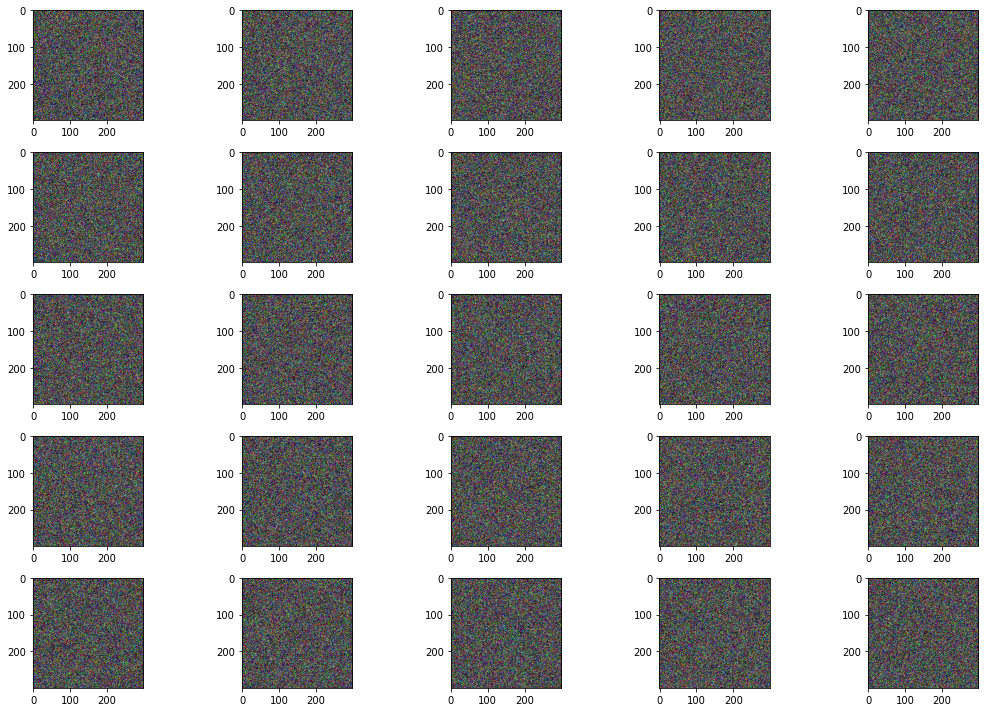

In [ ]:
fig=plt.figure(figsize=(15,10)) 
axes=[] 
for index in range(25):
  axes.append( fig.add_subplot(5,5, index+1))
  plot_sample(x,index)
fig.tight_layout()    
plt.show()

In [ ]:
y=tf.range(0, 100,1)


In [ ]:
type(y),y.shape,y.ndim,len(y)

(tensorflow.python.framework.ops.EagerTensor, TensorShape([10]), 1, 10)

In [ ]:
model_inc=keras.applications.InceptionV3(include_top=True)
model_inc.summary()

In [ ]:
model_inc2=keras.applications.InceptionV3(include_top=False)
model_inc2.summary()

In [ ]:
base_input=model_inc.layers[0].input
base_outputs=model_inc.layers[-2].output
final_outputs=layers.Dense(100)(base_outputs)
new_model_inc=keras.Model(inputs=base_input,outputs=final_outputs)
print(new_model_inc.summary())

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                          

In [ ]:
#Model compiling
new_model_inc.compile(
  optimizer=keras.optimizers.Adam(learning_rate=3e-4),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

In [ ]:
new_model_inc.fit(x,y,batch_size=32,epochs=3,verbose=1)

Epoch 1/3
4/4 [==============================] - 100s 21s/step - loss: 4.8072 - accuracy: 0.0200
Epoch 2/3
4/4 [==============================] - 91s 21s/step - loss: 3.0460 - accuracy: 0.8800
Epoch 3/3
4/4 [==============================] - 90s 20s/step - loss: 1.5372 - accuracy: 1.0000


##Pretrainded Tensorflow hub Model